# FS output visualization example

2024-02-16

kcho

In [40]:
import sys
sys.path.append('/data/pnl/kcho/Nick_HCP_visualization/nifti-snapshot')
import os
from nifti_snapshot import nifti_snapshot
import importlib
import pandas as pd
import nibabel as nb
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [2]:
wmparc_mgz_loc = '/data/pnl/U01_HCP_Psychosis/data_processing/BIDS/derivatives/pnlpipe/sub-1001/ses-1/anat/fs7.1.0/mri/wmparc.mgz'
t1w_mgz_loc = '/data/pnl/U01_HCP_Psychosis/data_processing/BIDS/derivatives/pnlpipe/sub-1001/ses-1/anat/fs7.1.0/mri/T1.mgz'

wmparc_nii_loc = 'wmparc.nii.gz'
t1w_nii_loc = 't1w.nii.gz'
command = f'source /data/pnl/soft/pnlpipe3/fs7.2.0/activate.sh && /data/pnl/soft/pnlpipe3/fs7.2.0/bin/mri_convert {wmparc_mgz_loc} {wmparc_nii_loc}'
os.popen(command).read()
command = f'source /data/pnl/soft/pnlpipe3/fs7.2.0/activate.sh && /data/pnl/soft/pnlpipe3/fs7.2.0/bin/mri_convert {t1w_mgz_loc} {t1w_nii_loc}'
os.popen(command).read()

> READ Freesurfer colormap  

In [4]:
with open('/data/pnl/soft/pnlpipe3/fs7.2.0/FreeSurferColorLUT.txt', 'r') as fp:
    lines_list = [x.strip().split() for x in fp.readlines()]
    lines_list = [x for x in lines_list if len(x) == 6]

df = pd.DataFrame(lines_list, columns=['roi_num', 'label_name', 'R', 'G', 'B', 'A'])
df = df[~df.roi_num.str.contains('#')]
df['roi_num'] = df['roi_num'].astype(int) 
df['R'] = df['R'].astype(int) 
df['G'] = df['G'].astype(int) 
df['B'] = df['B'].astype(int) 
# 75/76 removed. duplicates of 4/43
df_tmp = df[df.roi_num == 4]
df_tmp['roi_num'] = 75
df = pd.concat([df, df_tmp], ignore_index=True)

df_tmp = df[df.roi_num == 43]
df_tmp['roi_num'] = 76
df = pd.concat([df, df_tmp], ignore_index=True)

/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [41]:
wmparc_data = nb.load(wmparc_nii_loc).get_fdata()
t1_data = nb.load(t1w_nii_loc).get_fdata()
wmparc_unique_values = np.unique(wmparc_data)
# Reshape the DataFrame to match the digits array
digit_colors = dict(zip(df['roi_num'].astype(int),
                         zip(df['R'].astype(int)/255, df['G'].astype(int)/255, df['B'].astype(int)/255)))


# Initialize an empty list to store colors
roi_colors = []

# Loop through each row in digits array
for roi_num in list(wmparc_unique_values):
    roi_colors.append(digit_colors[int(roi_num)])
cmap = mcolors.ListedColormap(roi_colors)

	alpha_list : [1, 0.5]
	cmap_list : ['gray', <matplotlib.colors.ListedColormap object at 0x7f8ca2623518>]
	title : T1w and wmparc
	make_transparent_zero : True
done


/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


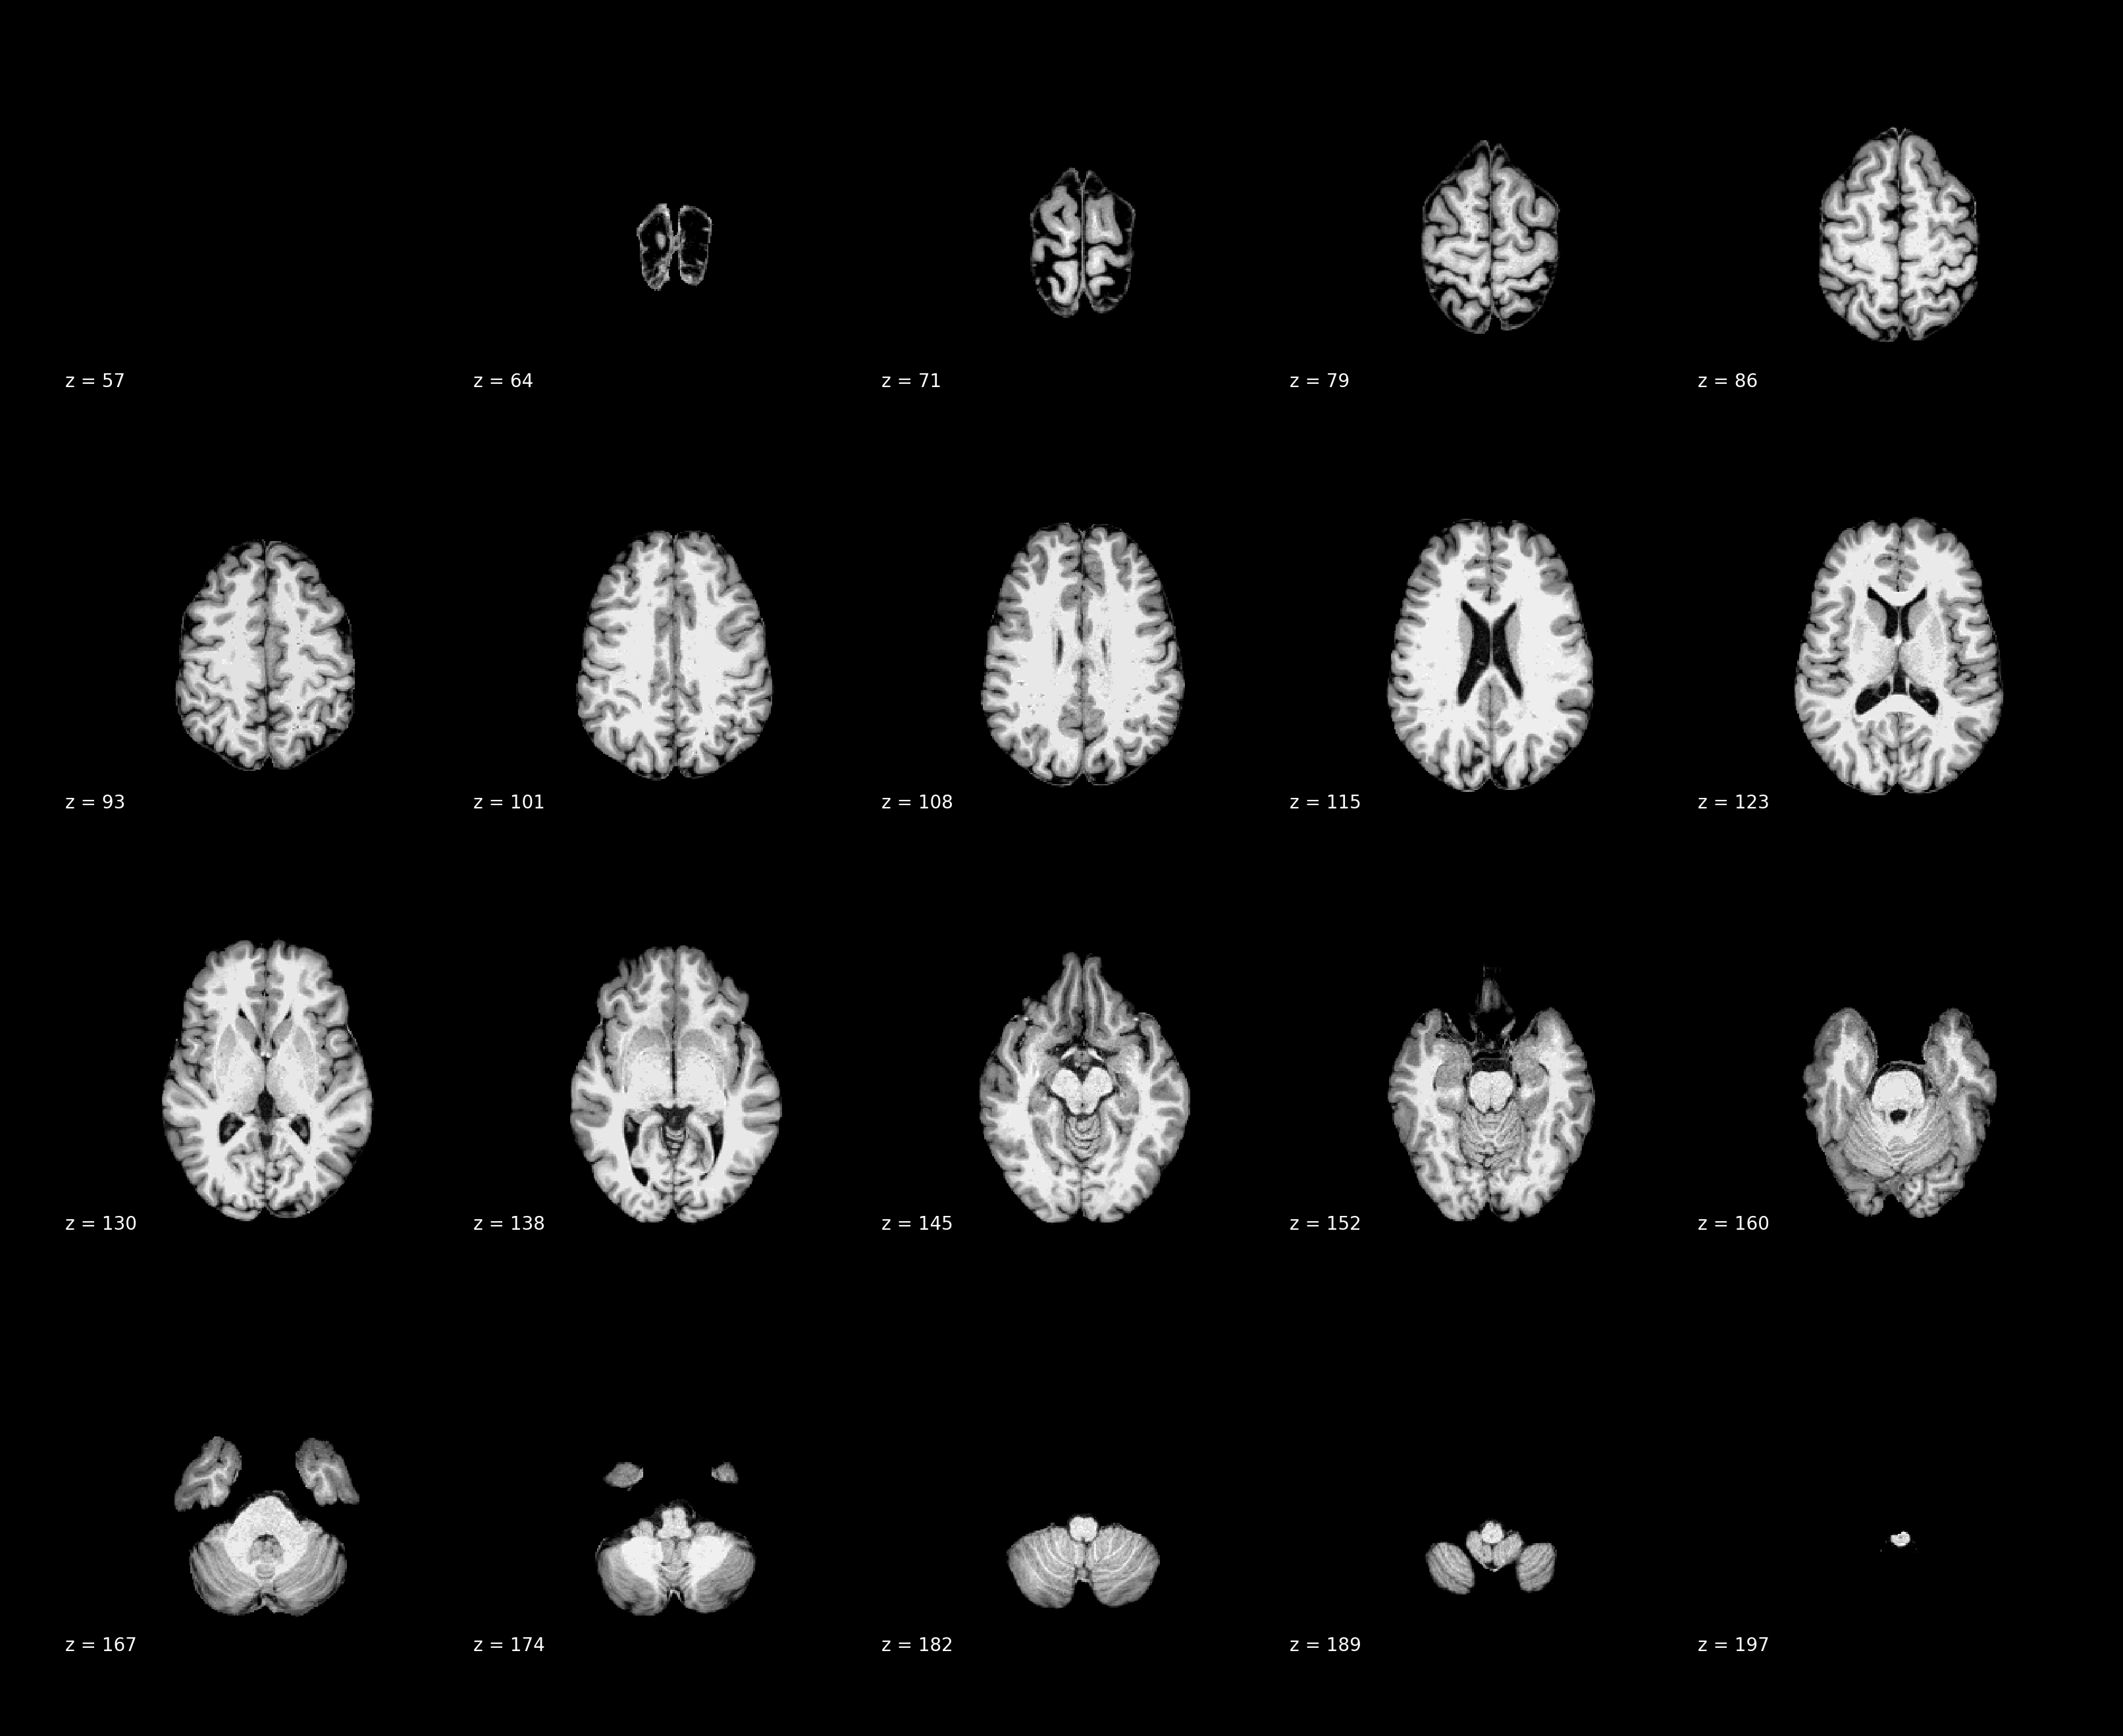

In [42]:
importlib.reload(nifti_snapshot)
simpleROI = nifti_snapshot.SimpleROI(
    image_data_list = [np.swapaxes(t1_data, 1, 2)],
    alpha_list = [1, 0.5], 
    cmap_list = ['gray', cmap],
    title = 'T1w and wmparc',
    make_transparent_zero = True,
)
simpleROI.fig.show()

	alpha_list : [1, 0.9]
	cmap_list : ['gray', <matplotlib.colors.ListedColormap object at 0x7f8ca2623518>]
	title : T1w and wmparc
	make_transparent_zero : True
done


/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/data/pnl/kcho/anacond

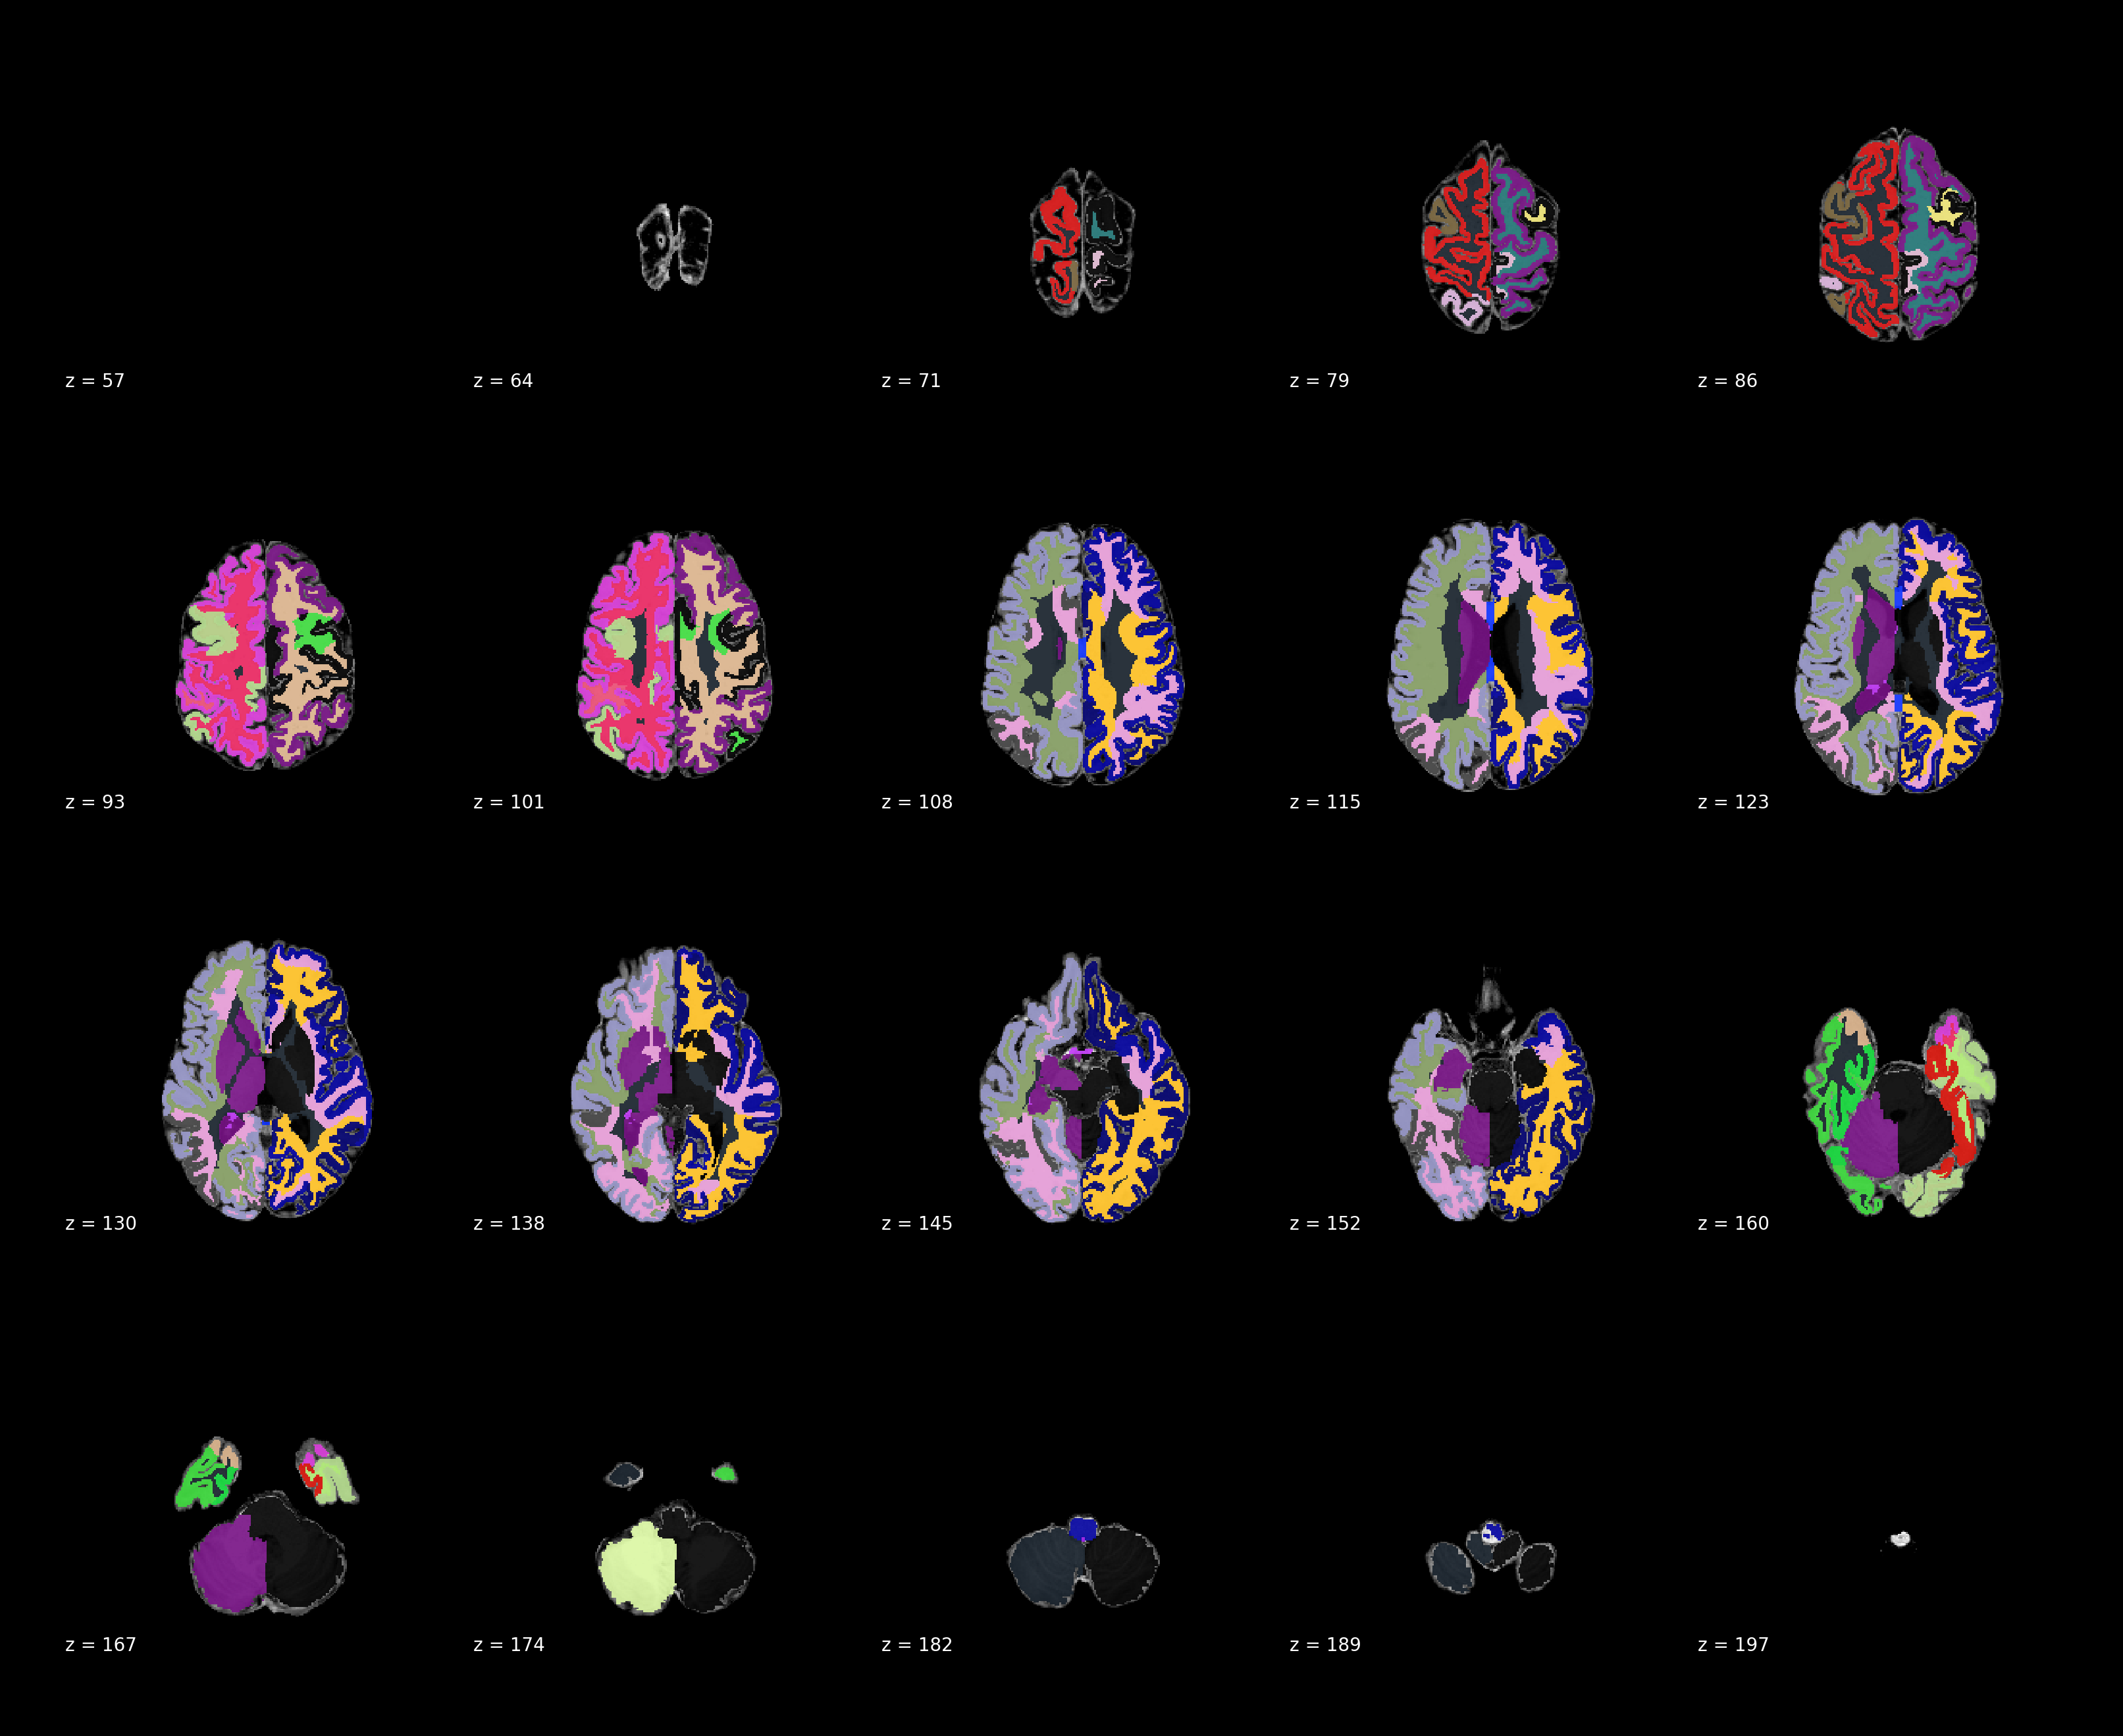

In [43]:
importlib.reload(nifti_snapshot)


simpleROI = nifti_snapshot.SimpleROI(
    image_data_list = [np.swapaxes(t1_data, 1, 2), np.swapaxes(wmparc_data, 1, 2)],
    alpha_list = [1, 0.9], 
    cmap_list = ['gray', cmap],
    title = 'T1w and wmparc',
    make_transparent_zero = True,
)
simpleROI.fig.show()

	slice_num_lowest : 70
	slice_num_highest : 183
	alpha_list : [1, 0.9]
	cmap_list : ['gray', <matplotlib.colors.ListedColormap object at 0x7f8ca2623518>]
	title : T1w and wmparc
	make_transparent_zero : True
done


/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


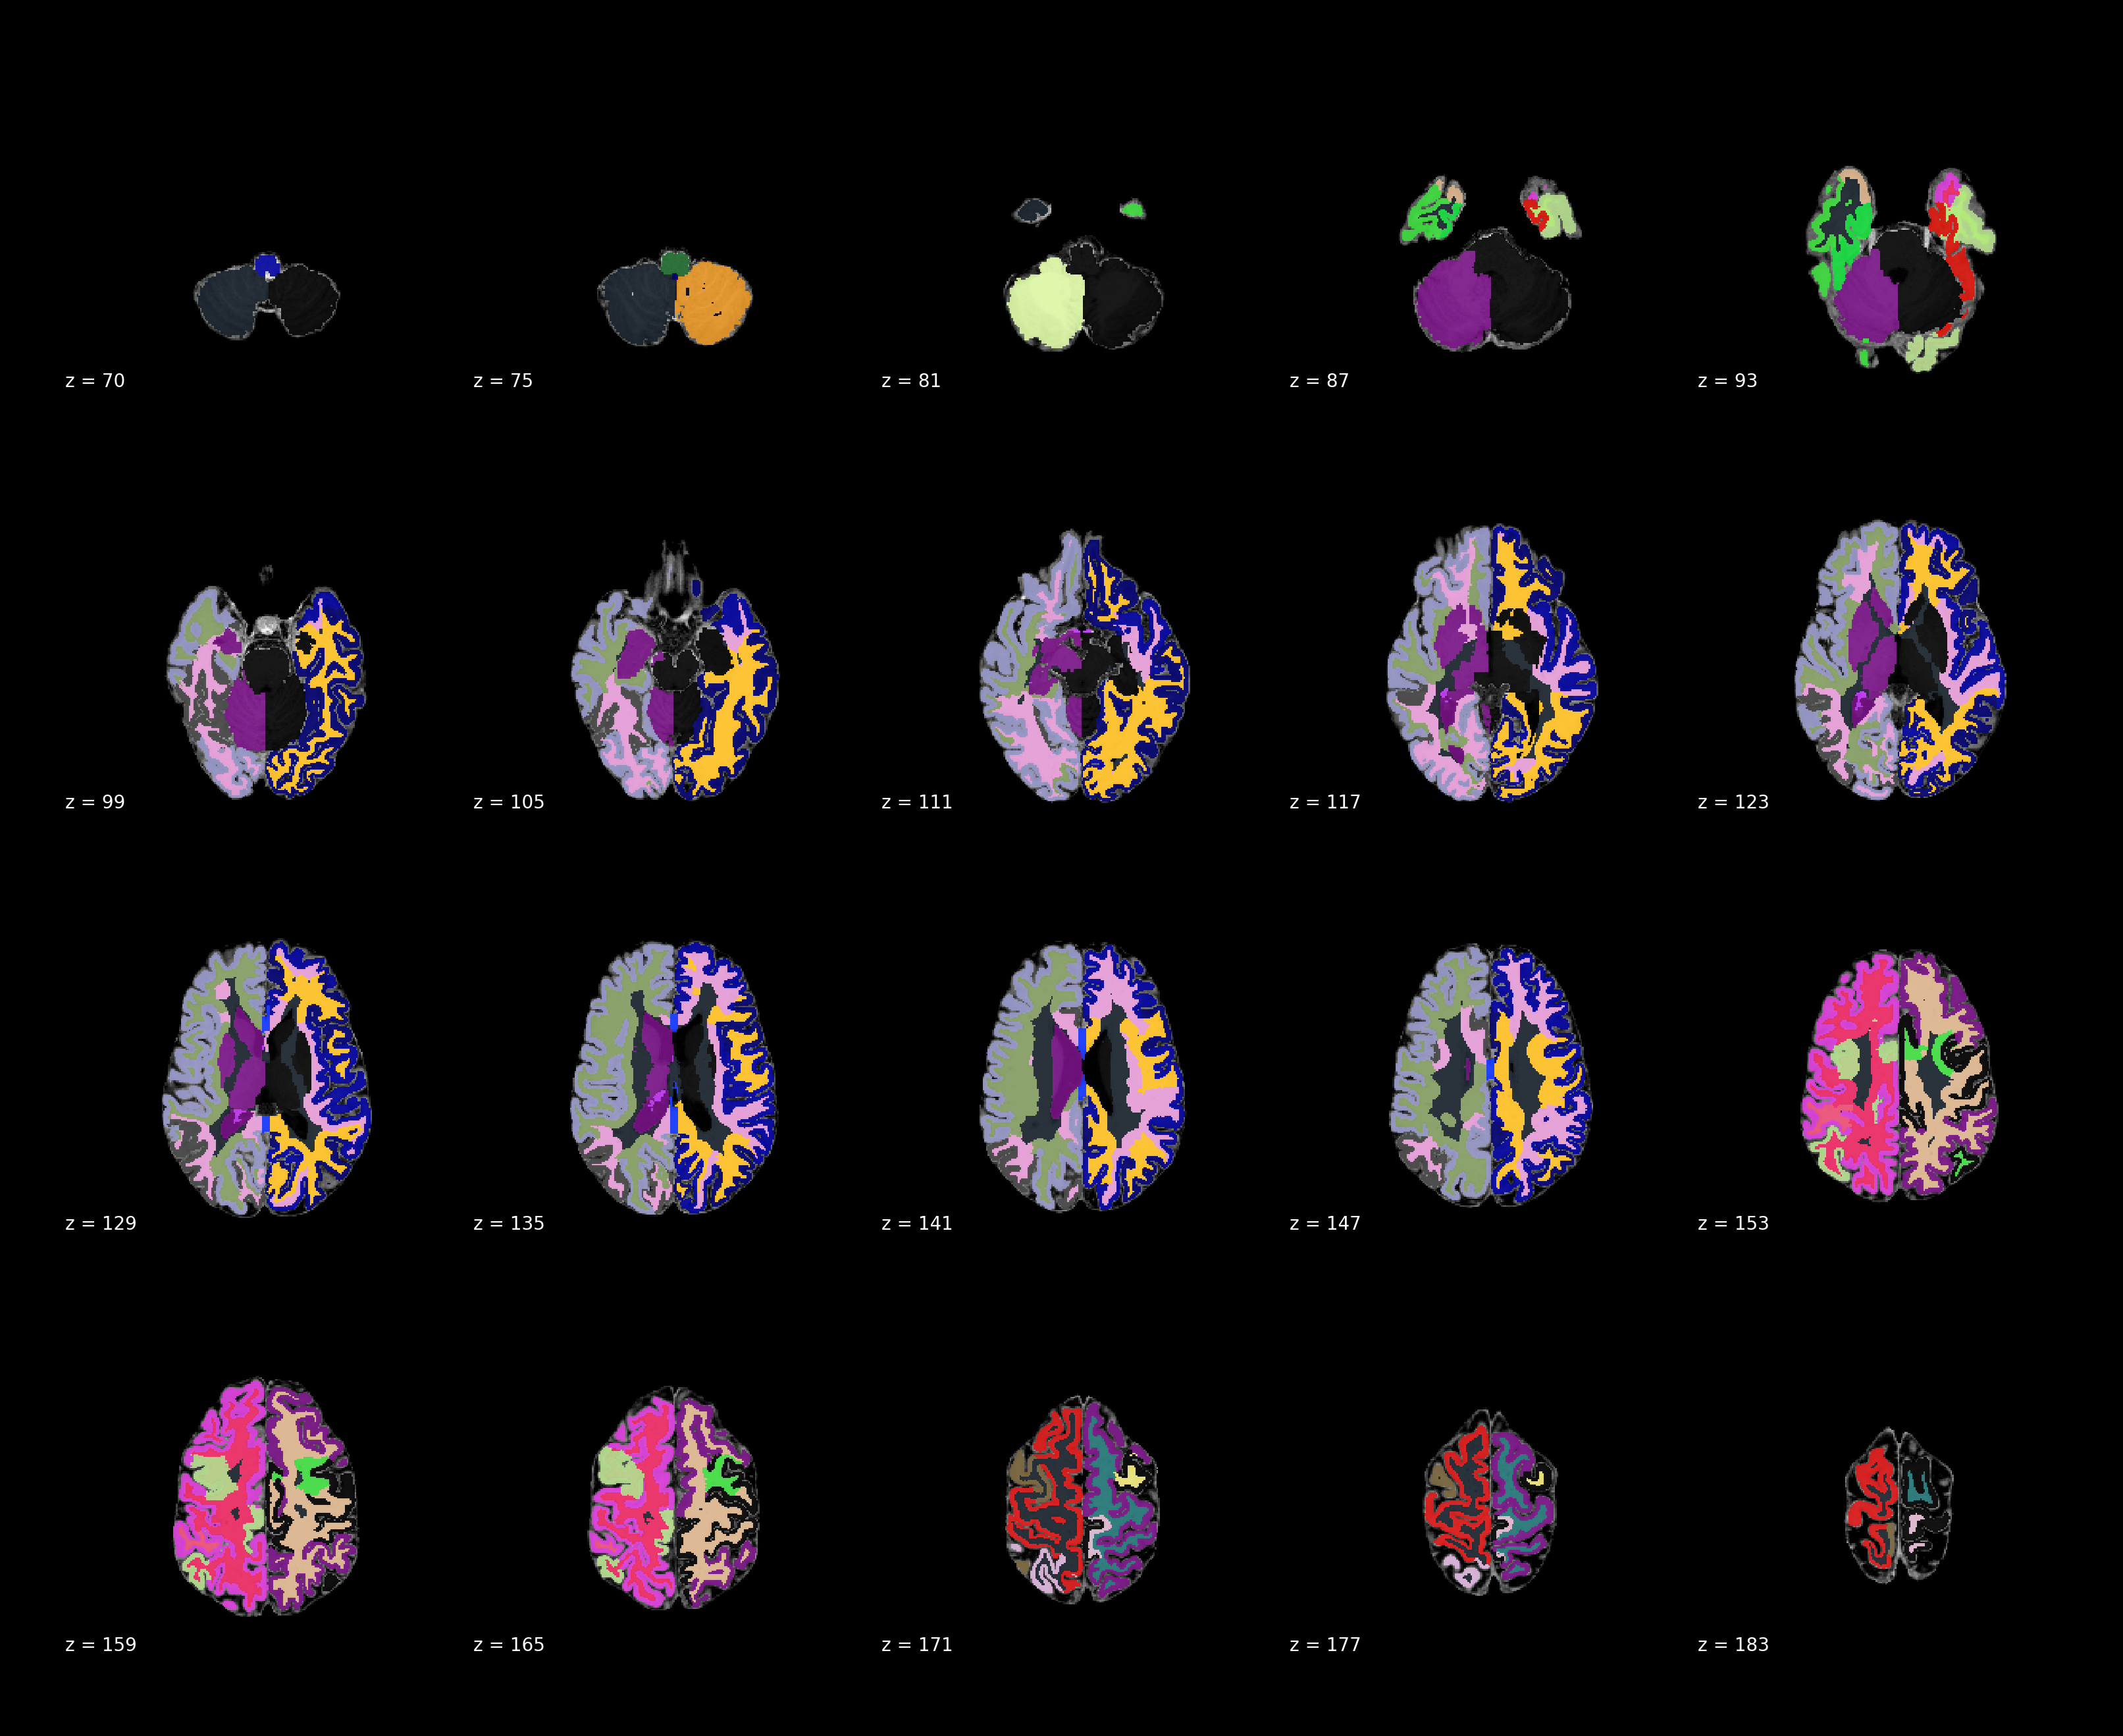

In [66]:
importlib.reload(nifti_snapshot)


simpleROI = nifti_snapshot.SimpleROI(
    image_data_list = [np.rot90(t1_data, 1, (2,1)), np.rot90(wmparc_data, 1, (2,1))],
    slice_num_lowest = 70,
    slice_num_highest = 183,
    alpha_list = [1, 0.9], 
    cmap_list = ['gray', cmap],
    title = 'T1w and wmparc',
    make_transparent_zero = True,
)
simpleROI.fig.show()

	box_x : [80, 180]
	box_y : [80, 160]
	slice_num_lowest : 70
	slice_num_highest : 183
	alpha_list : [1, 0.9]
	cmap_list : ['gray', <matplotlib.colors.ListedColormap object at 0x7f8ca2623518>]
	title : T1w and wmparc
	make_transparent_zero : True
done


/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


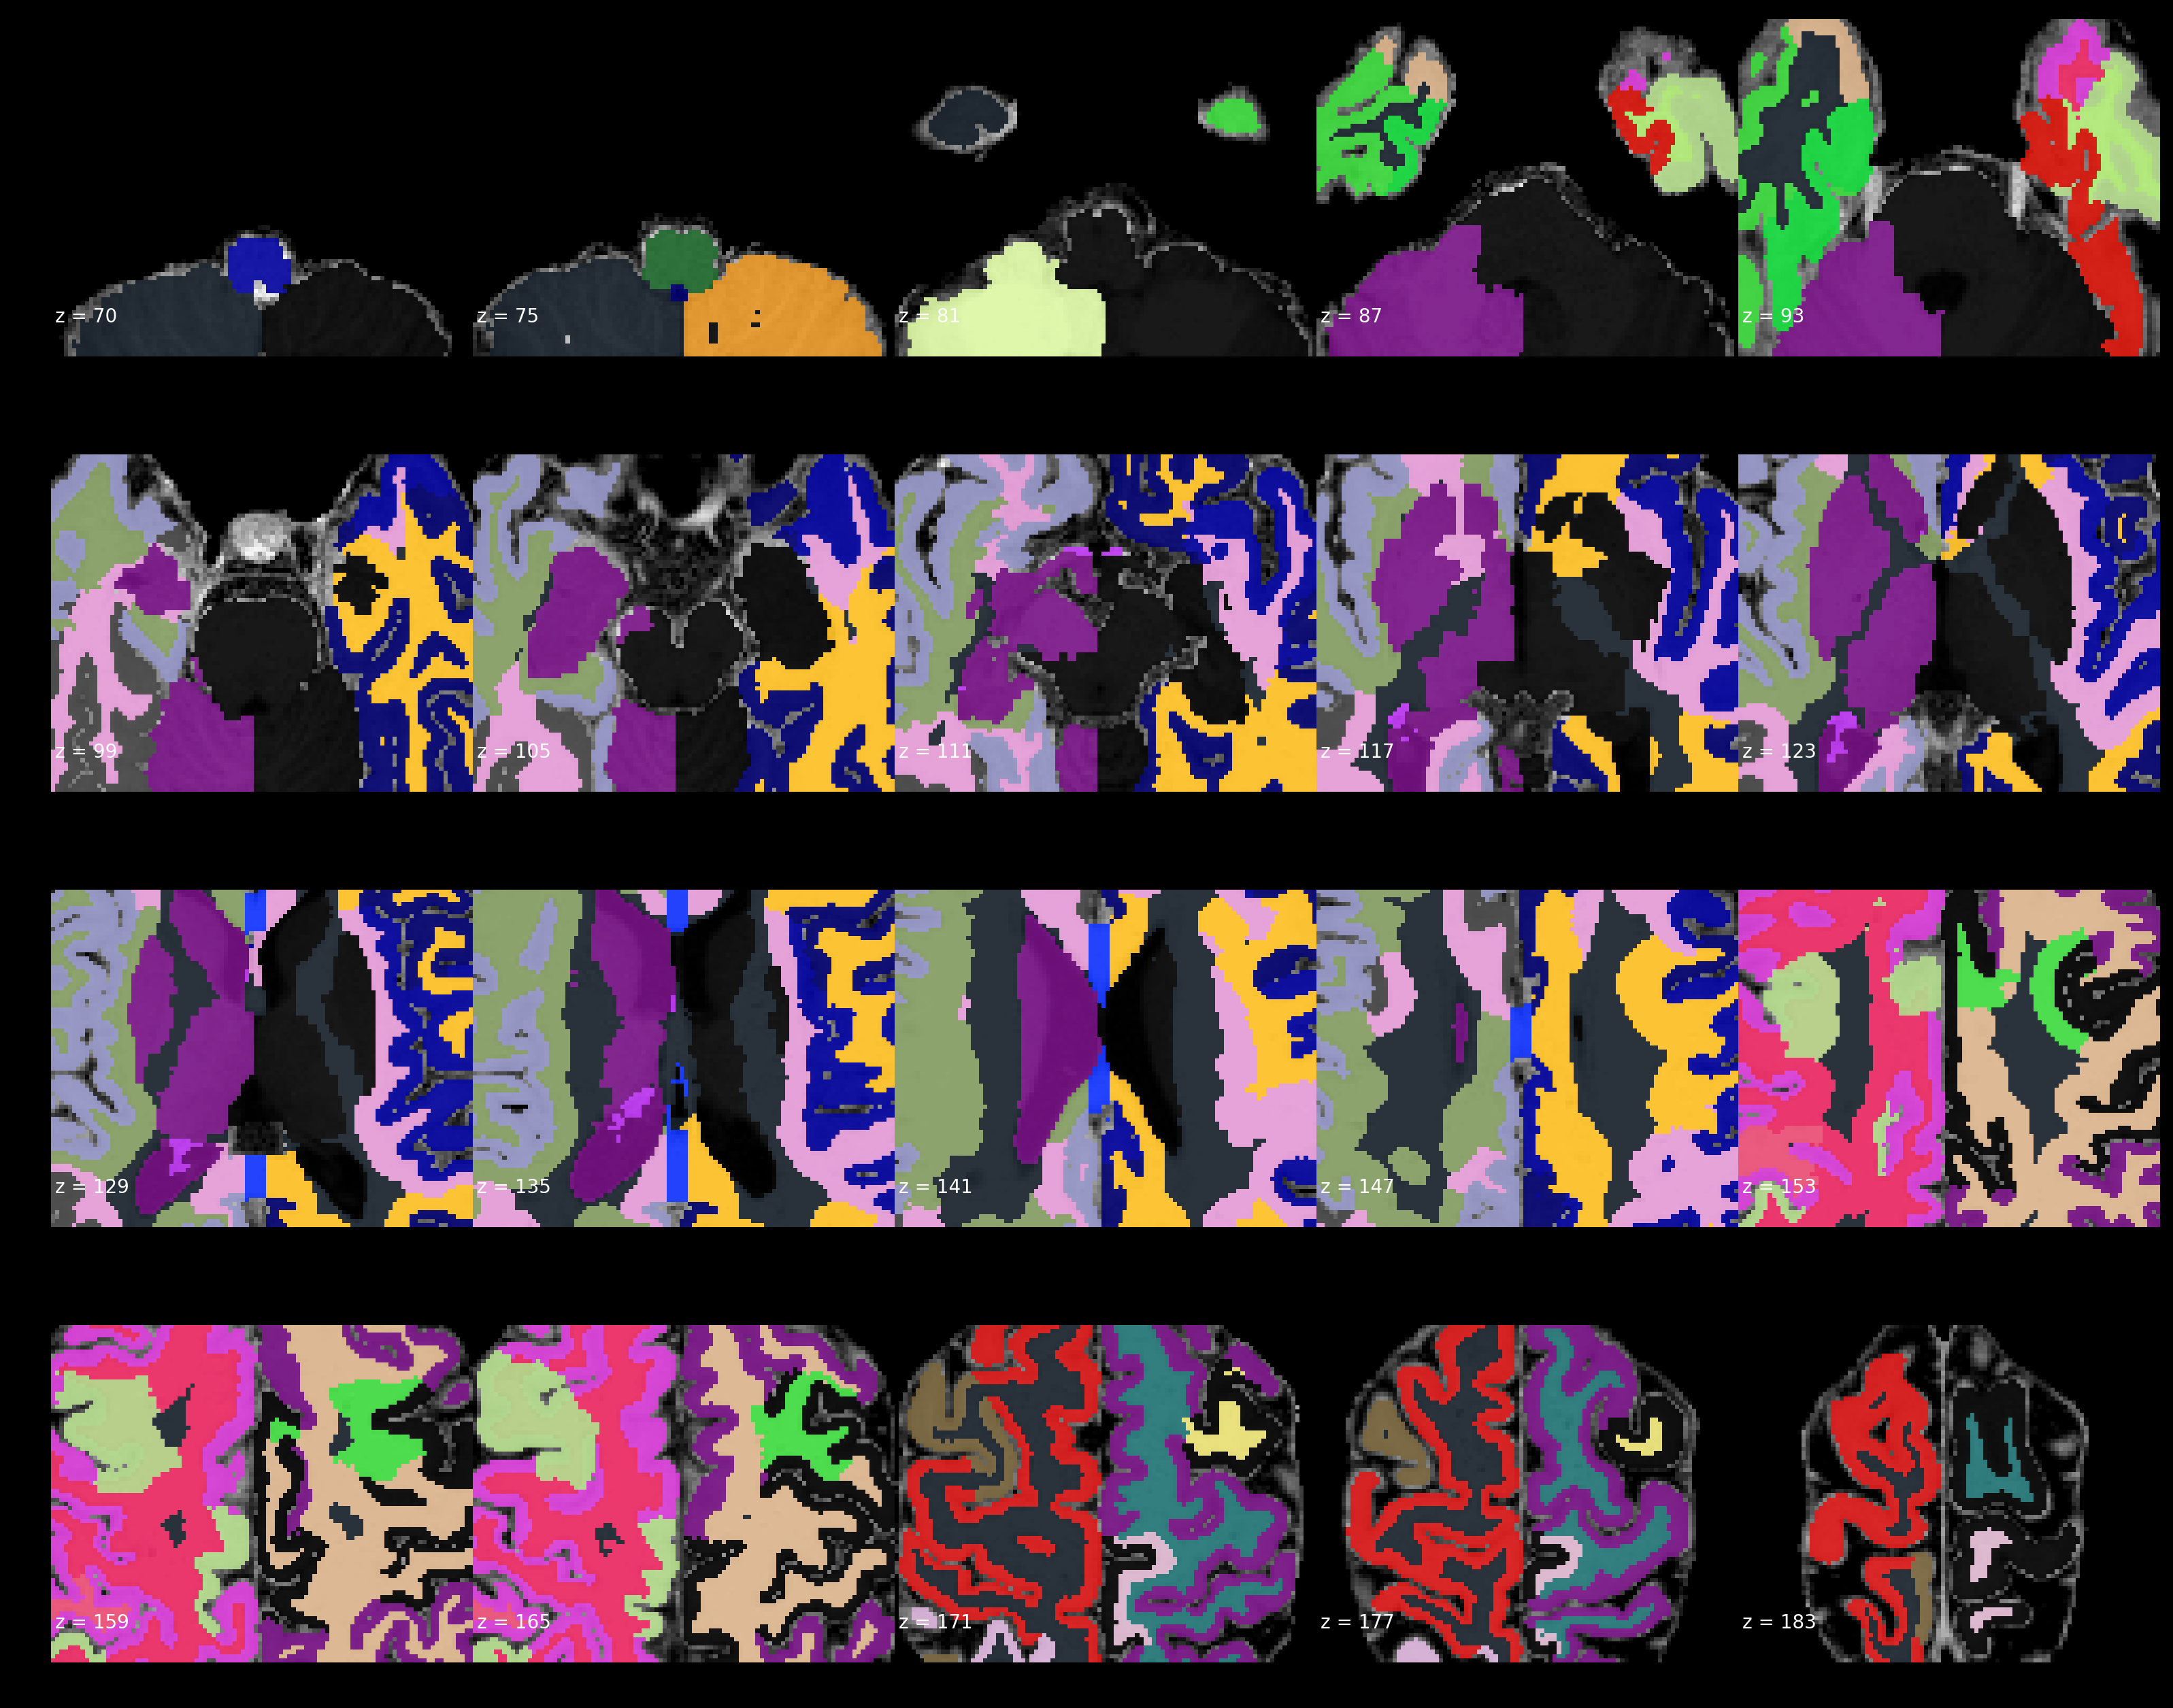

In [ ]:
importlib.reload(nifti_snapshot)


simpleROI = nifti_snapshot.SimpleROI(
    image_data_list = [np.rot90(t1_data, 1, (2,1)), np.rot90(wmparc_data, 1, (2,1))],
    box_x = [80, 180],
    box_y = [80, 160],
    # box_z = [40, 150],
    slice_num_lowest = 70,
    slice_num_highest = 183,
    alpha_list = [1, 0.9], 
    cmap_list = ['gray', cmap],
    title = 'T1w and wmparc',
    make_transparent_zero = True,
)
simpleROI.fig.show()

	box_x : [80, 180]
	box_y : [80, 160]
	slice_num_lowest : 70
	slice_num_highest : 183
	alpha_list : [1, 0.3]
	cmap_list : ['gray', <matplotlib.colors.ListedColormap object at 0x7f8ca2623518>]
	title : T1w and wmparc
	make_transparent_zero : True
done


/data/pnl/kcho/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


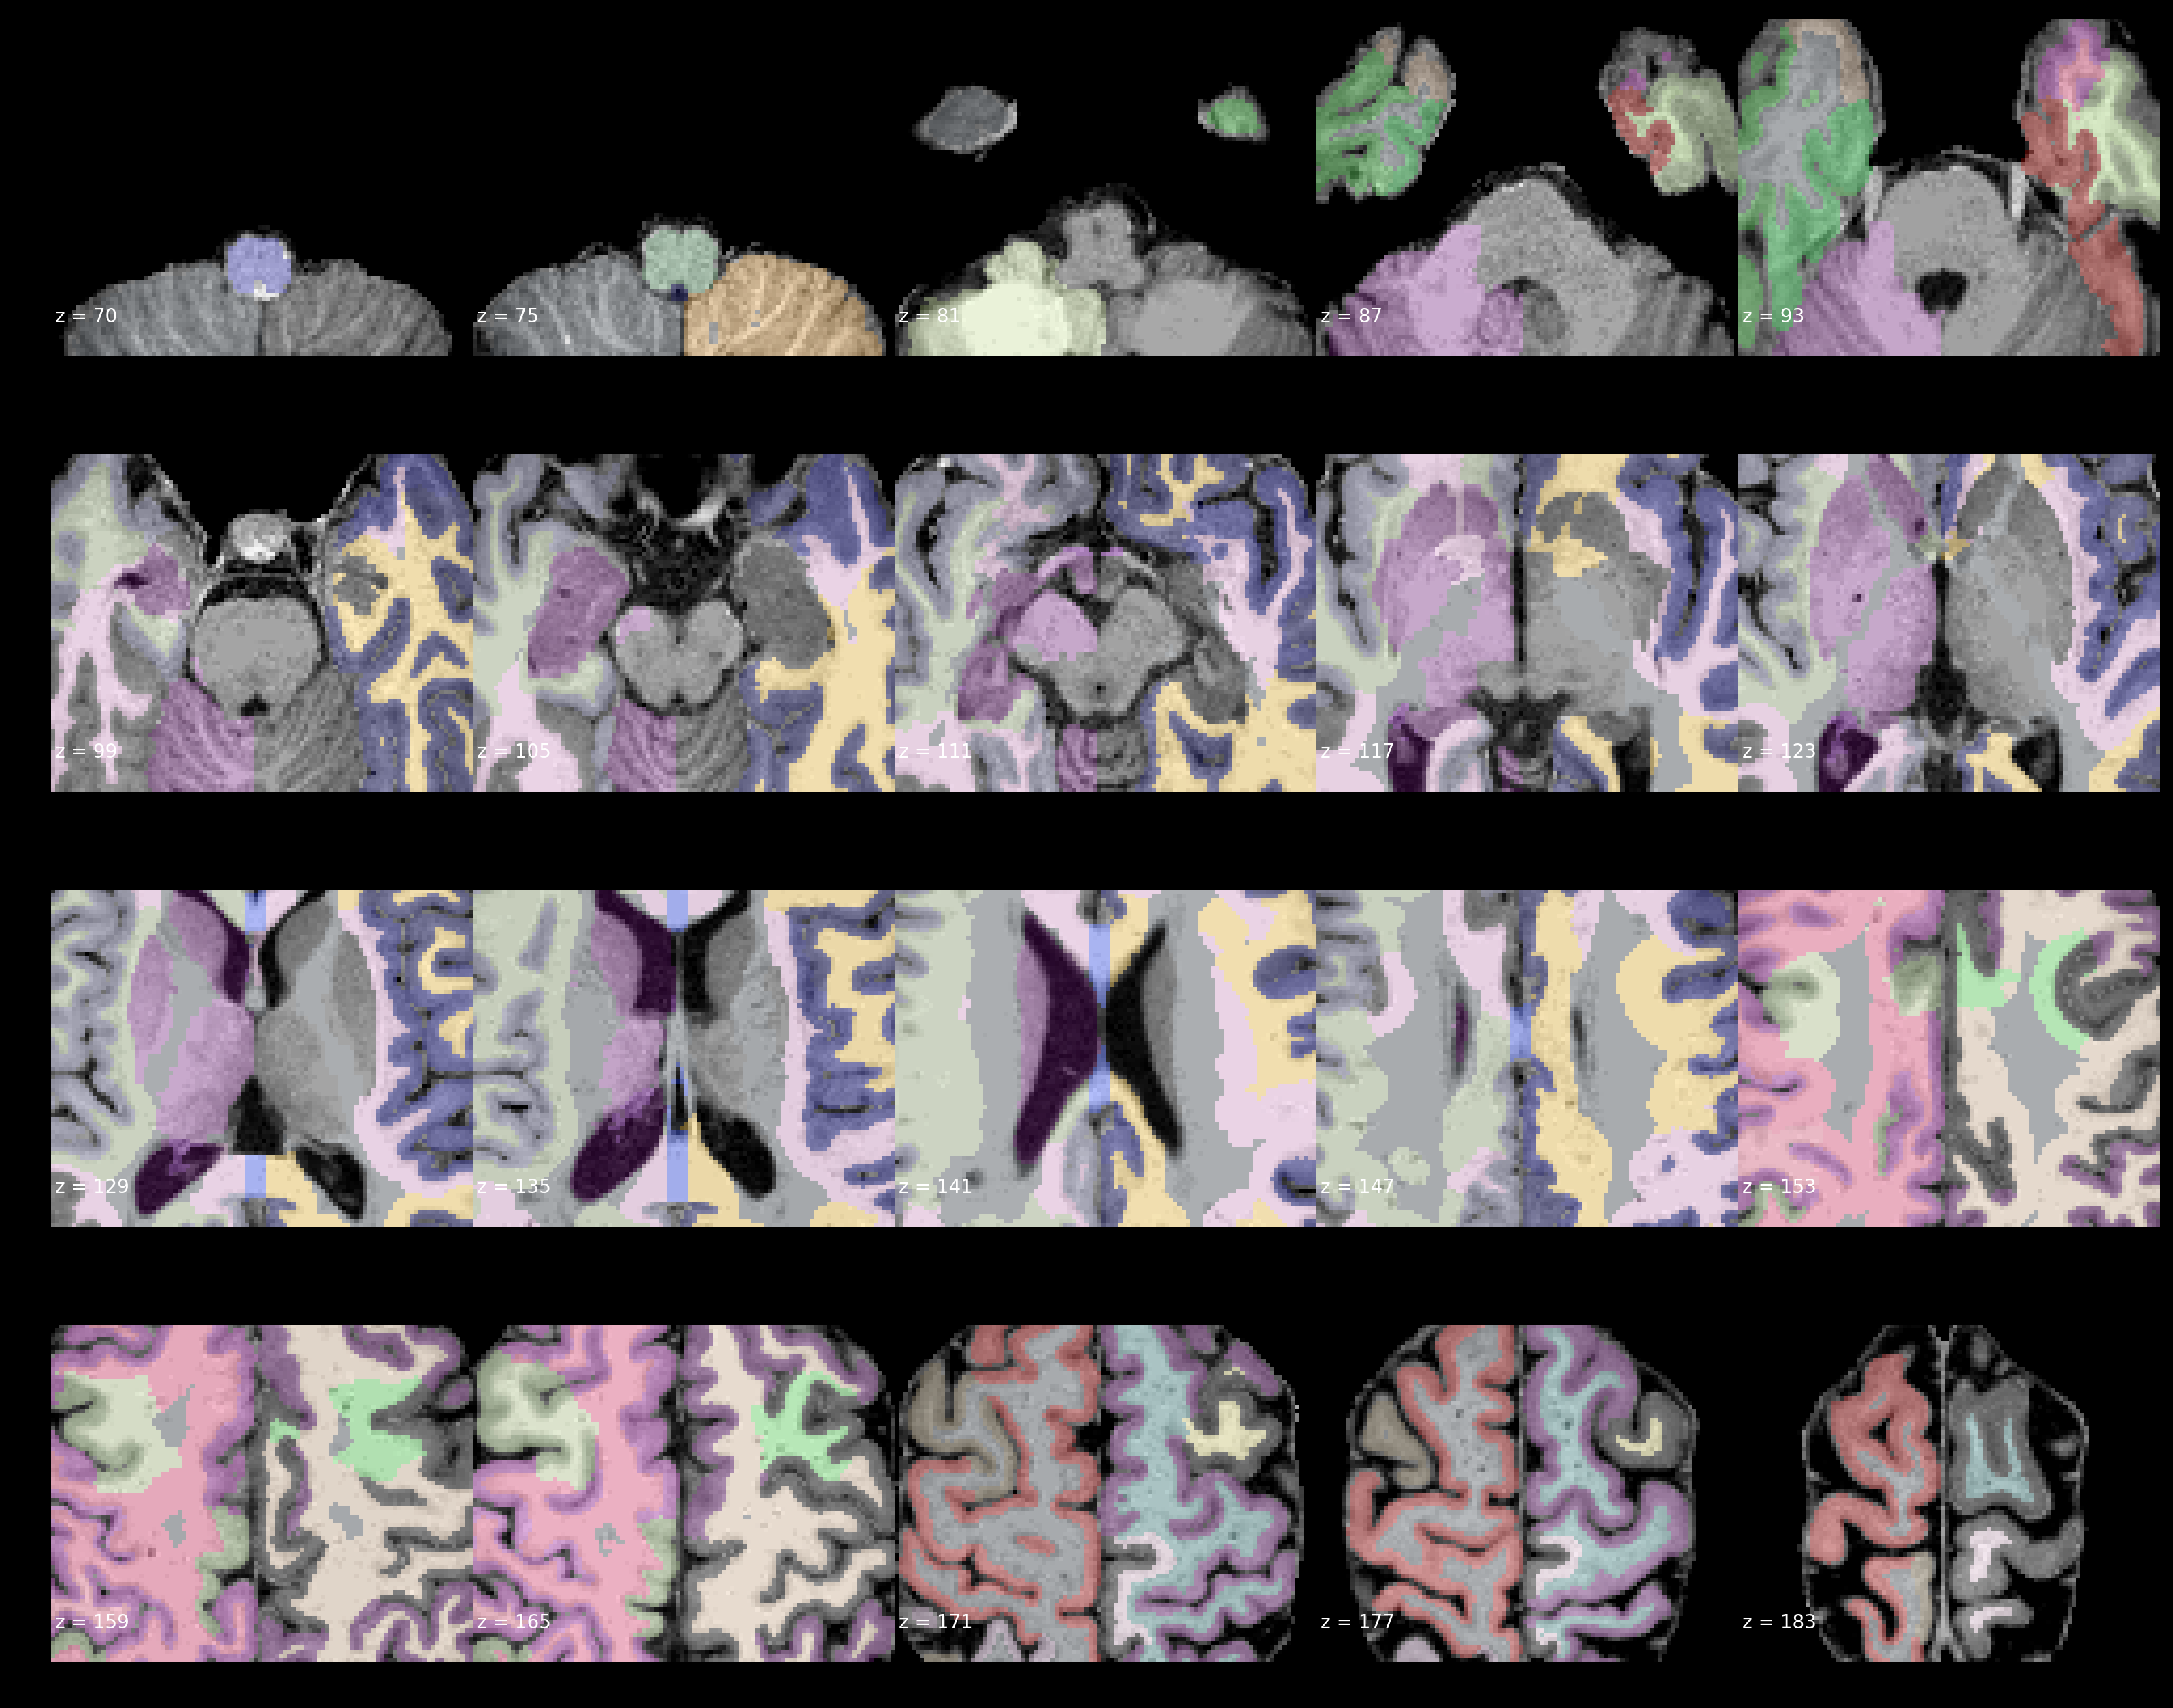

In [67]:
importlib.reload(nifti_snapshot)


simpleROI = nifti_snapshot.SimpleROI(
    image_data_list = [np.rot90(t1_data, 1, (2,1)), np.rot90(wmparc_data, 1, (2,1))],
    box_x = [80, 180],
    box_y = [80, 160],
    # box_z = [40, 150],
    slice_num_lowest = 70,
    slice_num_highest = 183,
    alpha_list = [1, 0.3], 
    cmap_list = ['gray', cmap],
    title = 'T1w and wmparc',
    make_transparent_zero = True,
)
simpleROI.fig.show()